# (연구&교수님) HST example 2

신록예찬  
2021-07-27

In [1]:
import heavysnow as hs 
import numpy as np
import pandas as pd 
import pybase as pb
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import rpy2 
%load_ext rpy2.ipython

In [2]:
### Example 2
np.random.seed(777)
import math
pi=math.pi
n=59
ang=np.linspace(-pi,pi-2*pi/n,n)
V=np.arange(n)+1
r=1
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=vx*0

f2=vx*0
f2[vy<0]=3+np.random.normal(size=sum(vy<0),scale=0.1)
f2[vy>0]= -3+np.random.normal(size=sum(vy>0),scale=0.1)


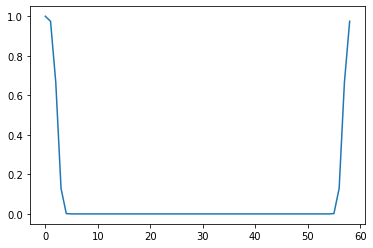

In [3]:
# Edg setting
Σ=pb.l2distance(np.matrix([vx,vy]).T)
θ=0.05
W=np.exp(-Σ**2/(2*θ**2))
E=W>0
plt.plot(W[0,:].T)
# color
import matplotlib.cm as cm
col=list(np.array(cm.rainbow((ang+pi)/2/pi)))

In [4]:
%R -i ang
%R -i vx
%R -i vy
%R -i n

In [6]:
%%R
library(latex2exp)
library(gridExtra)
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


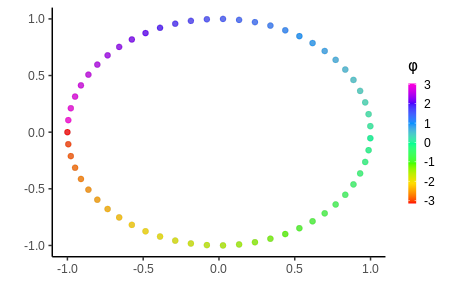

In [7]:
%%R -w 450 -h 300 -r 100
ex2df<-data.frame(cbind(ang,vx,vy))
names(ex2df)<-c("ang","vx","vy")
ex2plt <- ggplot(data=ex2df,aes(x=vx,y=vy))+
            geom_point(col="gray60",cex=1.5,alpha=0.7)+
            geom_point(data=ex2df[1:n,],aes(x=vx,y=vy,col=ang),cex=1.5,alpha=0.7)+
            xlab("")+ylab("")+scale_colour_gradientn(colours=rainbow(7))+labs(col=TeX("$\\phi$"))+theme_classic()+
            theme(legend.key.width = unit(2,"mm"))
show(ex2plt)

In [8]:
gs1=hs.GraphSignal(V,W,f1)
gs2=hs.GraphSignal(V,W,f2)

In [9]:
hs1=hs.HeavySnowTransform(gs1)
hs2=hs.HeavySnowTransform(gs2)

In [19]:
hs1.snow(tau=40000,b=0.3)
hs2.snow(tau=40000,b=0.3)

HST (tau= 40000, b=0.3)
40000/40000
HST completed and all history is recorded.
HST (tau= 40000, b=0.3)
40000/40000
HST completed and all history is recorded.

In [20]:
from sklearn.decomposition import PCA 
p1=PCA(n_components=3)
p2=PCA(n_components=3)

p1.fit(hs1.snowdistance)
p2.fit(hs2.snowdistance)

r1=p1.transform(hs1.snowdistance)
r2=p2.transform(hs2.snowdistance)

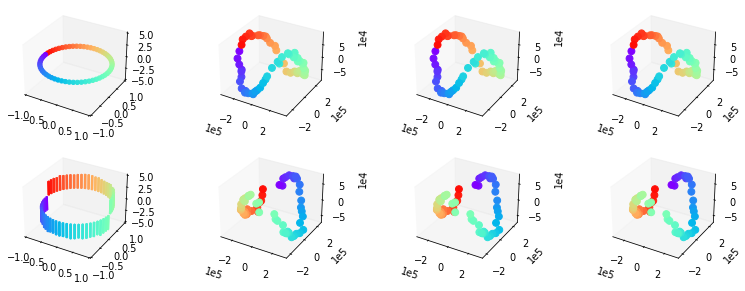

In [21]:
# 1. 
p=plt.figure(figsize=(12,4), dpi=70)  # Make figure object 

# 2. 
ax1=p.add_subplot(2,4,1, projection='3d')
ax2=p.add_subplot(2,4,2, projection='3d')
ax3=p.add_subplot(2,4,3, projection='3d')
ax4=p.add_subplot(2,4,4, projection='3d')
ax5=p.add_subplot(2,4,5, projection='3d')
ax6=p.add_subplot(2,4,6, projection='3d')
ax7=p.add_subplot(2,4,7, projection='3d')
ax8=p.add_subplot(2,4,8, projection='3d')

# 3. 
ax1.grid(False)
ax1.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax1.scatter3D(vx, vy, f1, c=col,alpha=1)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
ax1.set_zlim(-5,5)

ax2.grid(False)
ax2.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax2.scatter3D(r1[:,0],r1[:,1],r1[:,2],s=50,c=col,alpha=1)

ax3.grid(False)
ax3.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax3.scatter3D(r1[:,0],r1[:,1],r1[:,2],s=50,c=col,alpha=1)

ax4.grid(False)
ax4.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax4.scatter3D(r1[:,0],r1[:,1],r1[:,2],s=50,c=col,alpha=1)


ax5.grid(False)
ax5.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax5.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax5.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
top = -f2
bottom = np.zeros_like(top)
width=depth=0.05
ax5.bar3d(vx, vy, bottom, width, depth, top, shade=False,color=col)
ax5.set_xlim(-1,1)
ax5.set_ylim(-1,1)
ax5.set_zlim(-5,5)

ax6.grid(False)
ax6.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax6.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax6.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax6.scatter3D(r2[:,0],r2[:,1],r2[:,2],s=50,c=col,alpha=1)

ax7.grid(False)
ax7.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax7.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax7.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax7.scatter3D(r2[:,0],r2[:,1],r2[:,2],s=50,c=col,alpha=1)

ax8.grid(False)
ax8.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax8.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax8.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
ax8.scatter3D(r2[:,0],r2[:,1],r2[:,2],s=50,c=col,alpha=1)
p.tight_layout(h_pad=2.6) #rect : tuple (left, bottom, right, top), optional